### Import Libraries

In [ ]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import math

### Example sentiment analysis

In [6]:
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

### Read Adani tweets

In [14]:
df = pd.read_csv('Tweets/adani/adani.csv')
df = df[["tweet", "language"]]
df

,tweet,language
0,"ना खाऊंगा, ना खाने दूंगा"" कहने वाले Modi जी जु...",hi
1,@BBCHindi Aise wade to pm roz karte hain to ky...,hi
2,PM Modi की देशविरोधी रणनीति- ▪️घोटालेबाज़ दोस...,hi
3,@ramanmann1974 @ApplePi85436399 UNDER FARM LAW...,en
4,Adani is the reason,en
...,...,...
9995,@sudhirchaudhary Hello 🥱 Sudhirji kuchh Adani...,in
9996,@AdityaRajKaul Ask this question to PM Modi . ...,en
9997,@ronyn123 @TVMohandasPai You keep shouting Ada...,en
9998,Adani Green-Upper Circuit on Monday ?? Global...,en


### Translate Tweets

In [ ]:
list = df.head(100)['tweet'].tolist()
list

### Batch Sentiment Analysis

In [18]:

sentiment_list = sentiment_pipeline(list)
sent_df = pd.DataFrame.from_records(sentiment_list)
sent_df

,label,score
0,NEGATIVE,0.979894
1,NEGATIVE,0.986906
2,NEGATIVE,0.974373
3,NEGATIVE,0.998214
4,POSITIVE,0.941592
...,...,...
95,NEGATIVE,0.996294
96,NEGATIVE,0.980745
97,NEGATIVE,0.983567
98,NEGATIVE,0.794995


<function matplotlib.pyplot.show(close=None, block=None)>

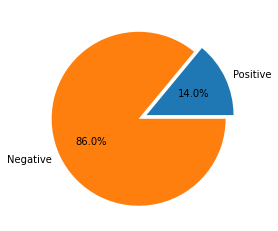

In [43]:

total = sent_df['label'].count()
positive = sent_df['label'].value_counts()['POSITIVE']
negative = sent_df['label'].value_counts()['NEGATIVE']

positive_percent = positive/total * 100
negative_percent = negative/total * 100

# print(f"{positive_percent}% Positive")
# print(f"{negative_percent}% Negative")



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Negative',
values = [positive_percent, negative_percent]
explode = [0.1, 0] if positive_percent > negative_percent else [0, 0.1] 

# fig1, ax1 = plt.subplots()
# ax1.pie(values, explode=(values == max(values)) * 0.1, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%')
plt.show


# fig1